<h1 style="color:blue; font-size:40px; text-align:center;">
EN 3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering
</h1>

<h3 style="color:gray; font-size:24px; text-align:center;">
Index: 220276V    Name: Jayathissa M.P.N.V.
</h3>

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Question 1 :

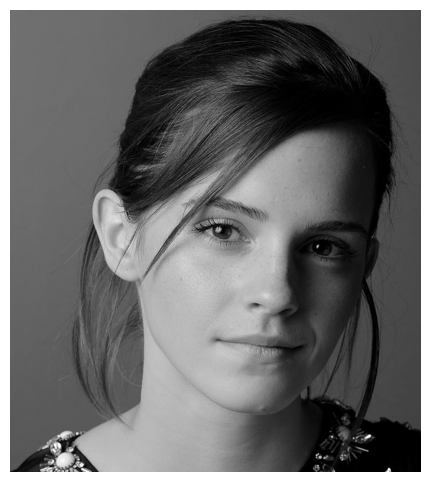

In [3]:
# Import Emma Image 
emma = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
# Display the imported image
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(emma, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

51
100
105
(256,)


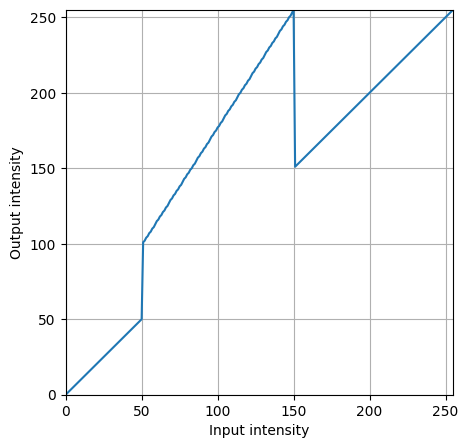

In [4]:
# Design the transformation Filter

# Control points
c = np.array([(50, 100), (150, 255)])

#Create evenly spaced values for time stamps needed
t1 = np.linspace(0, c[0,0], c[0,0] + 1 - 0).astype('uint8')
print(len(t1))
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[1,0] + 1, c[1,1], c[1,1] - c[1,0]).astype('uint8')
print(len(t3))

# Concatenate all segments to create the transformation array
t = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
print(t.shape)

# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(t)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()


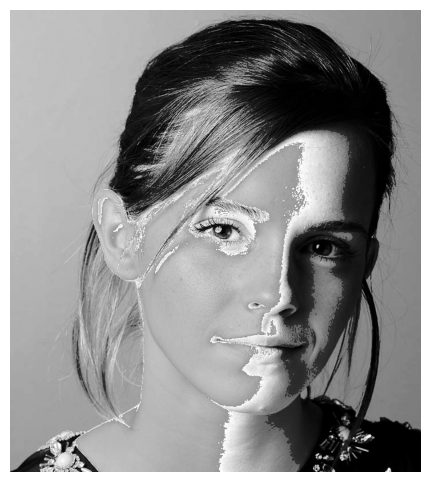

In [5]:
# Transform the image
emma_transformed = t[emma]

#Display transformed image
plt.figure(figsize=(6, 6))
plt.imshow(emma_transformed, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

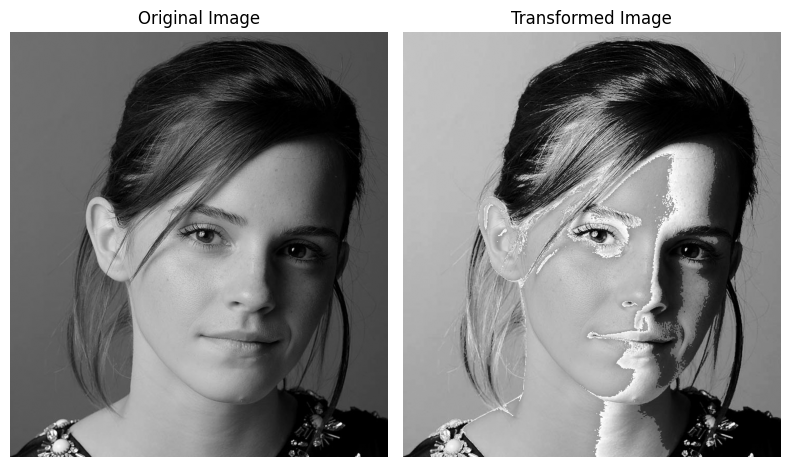

In [6]:
# Display the transformed image

fig, ax = plt.subplots(1, 2, figsize=(8, 6))
ax[0].imshow(emma, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis("off")
ax[1].imshow(emma_transformed, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
ax[1].axis("off")

plt.tight_layout()
plt.show()


## Question 2 :

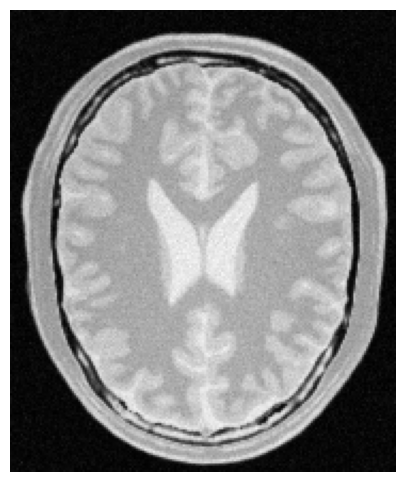

In [7]:
# import the image
brain = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

# Display the imported image
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(brain, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

#### White Matter

(256,)


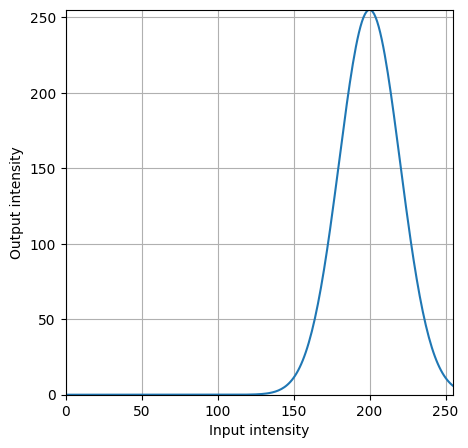

In [8]:
# define the gaussian pulse

mu = 200
sigma = 20
x = np.linspace(0, 255, 256)
t = 255 * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Ensure the output is in the valid range for image intensities [0, 255]
t = np.clip(t, 0, 255)

print(t.shape)

# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(t)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()

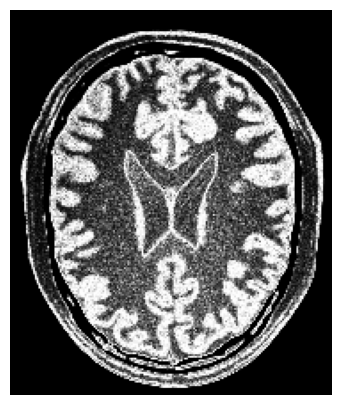

In [9]:
# Transformation of the picture

white = t[brain]

# Display the image
plt.figure(figsize=(5, 5))
plt.imshow(white, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

#### Gray Matter


(256,)


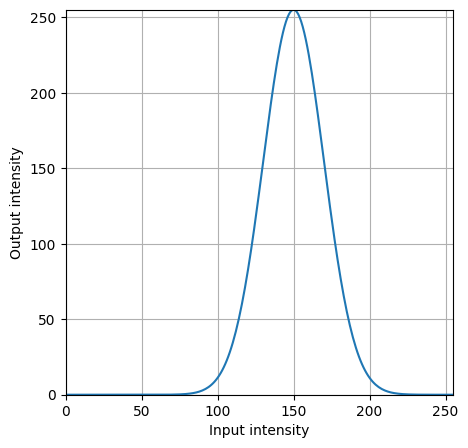

In [10]:
# define the gaussian pulse
mu = 150
sigma = 20
x = np.linspace(0, 255, 256)
t = 255 * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Ensure the output is in the valid range for image intensities [0, 255]
t = np.clip(t, 0, 255)

print(t.shape)

# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(t)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()

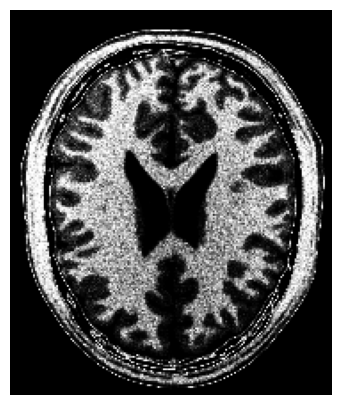

In [11]:
# Transformation of the picture

gray = t[brain]

# Display the image
plt.figure(figsize=(5, 5))
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

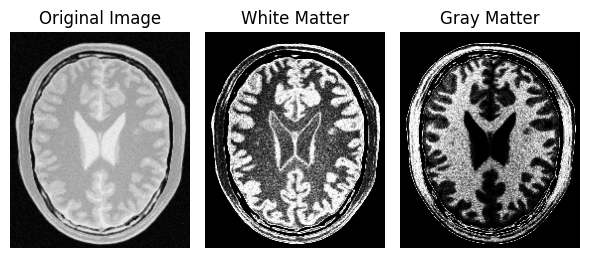

In [12]:
# Plot three images 

fig, ax = plt.subplots(1, 3, figsize=(6, 6))
ax[0].imshow(brain, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis("off")
ax[1].imshow(white, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('White Matter')
ax[1].axis("off")
ax[2].imshow(gray, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Gray Matter')
ax[2].axis("off")


plt.tight_layout()
plt.show()

## Question 3: 

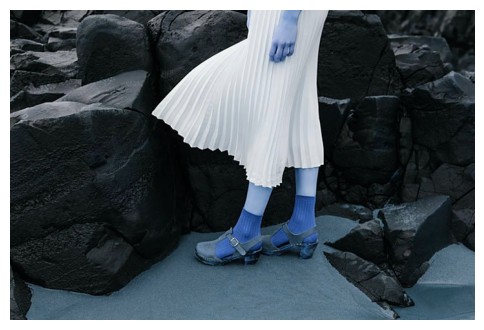

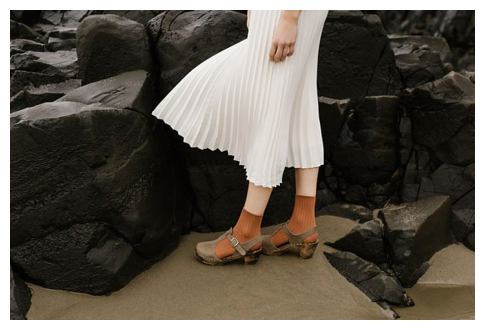

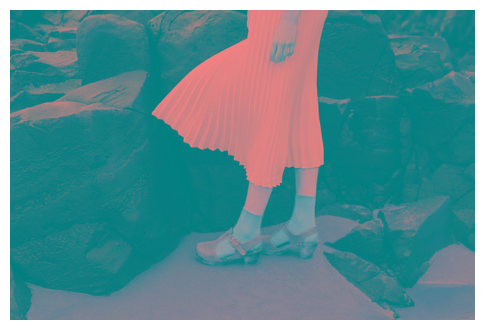

In [13]:
# Import image
imq3_bgr = cv.imread('a1images/highlights_and_shadows.jpg')

# Display the imported image
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(imq3_bgr, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

imq3_lab = cv.cvtColor(imq3_bgr, cv.COLOR_BGR2LAB)
imq3_rgb = cv.cvtColor(imq3_bgr, cv.COLOR_BGR2RGB)



fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(imq3_rgb, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(imq3_lab, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

#### Apply Gamma Correction

In [14]:
# Split the image in to L*a*b* color space
L,a,b = cv.split(imq3_lab)

# Define and apply gamma transformation
gamma = 0.5
t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0, 256)]).astype('uint8')
L_modified = cv.LUT(L, t)

# Merge the channels
merged = cv.merge([L_modified, a, b])
imq3_modified = cv.cvtColor(merged, cv.COLOR_LAB2RGB)


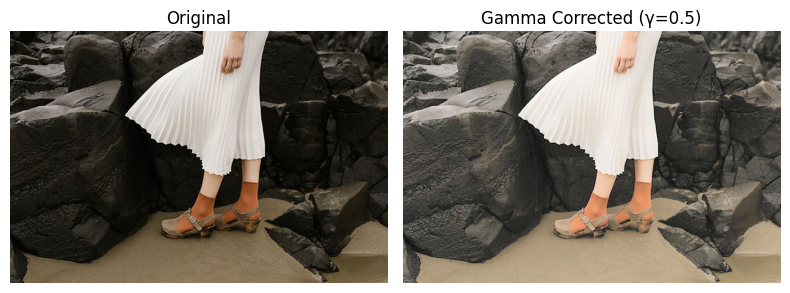

In [15]:
# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(8, 6))

# Plot the first image
axs[0].imshow(imq3_rgb)
axs[0].set_title('Original')
axs[0].axis('off')  # Turn off the axis

# Plot the second image
axs[1].imshow(imq3_modified)
axs[1].set_title(f'Gamma Corrected (γ={gamma})')
axs[1].axis('off')  # Turn off the axis

# Show the plot
plt.tight_layout()
plt.show()

#### Histogram Computation

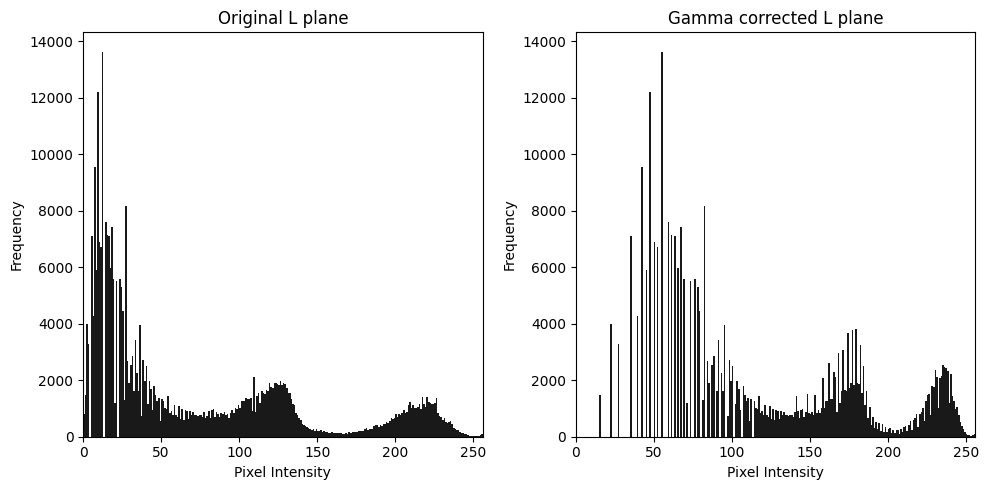

In [16]:
# Compute the histograms for both images
hist1 = cv.calcHist([L], [0], None, [256], [0, 256])
hist2 = cv.calcHist([L_modified], [0], None, [256], [0, 256])

L_flat = L.flatten()
L_modified_flat = L_modified.flatten()

# Create a figure with two subplots
plt.figure(figsize=(10, 5))

# First subplot: Histogram of the first image
plt.subplot(1, 2, 1)
plt.hist(L_flat, bins=256, range=(0, 256), color='black', alpha=0.9)
plt.title('Original L plane')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Second subplot: Histogram of the second image
plt.subplot(1, 2, 2)
plt.hist(L_modified_flat, bins=256, range=(0, 256), color='black', alpha=0.9)
plt.title('Gamma corrected L plane')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Display the plots side by side
plt.tight_layout()  # Adjusts the spacing between subplots for a neat layout
plt.show()

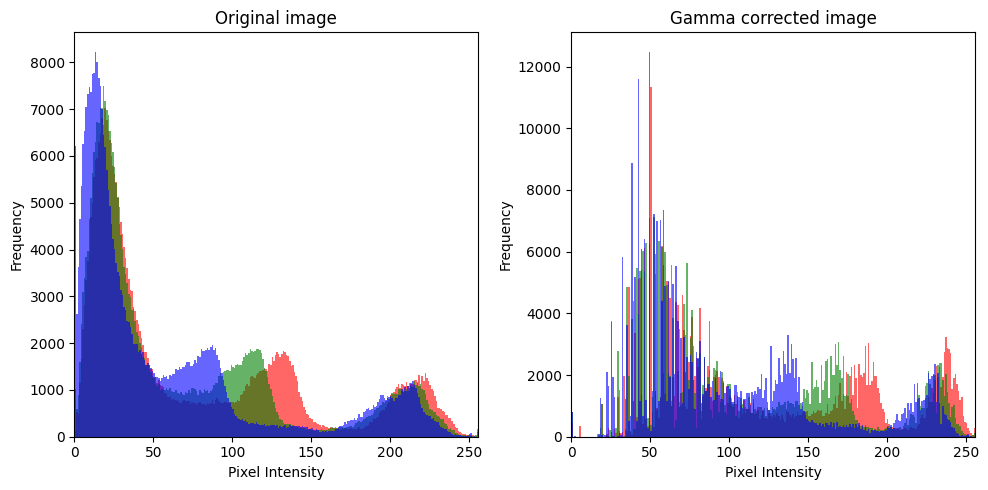

In [17]:
# Color channels
colors = ('r', 'g', 'b')  # Color channels
plt.figure(figsize=(10, 5))

# First image's histograms
plt.subplot(1, 2, 1)
for i, col in enumerate(colors):
    # Flatten the channel
    channel_flat = imq3_rgb[:, :, i].flatten()  # Extract and flatten the red, green, or blue channel
    plt.hist(channel_flat, bins=256, range=(0, 256), color=col, alpha=0.6)  # Use plt.hist
plt.title('Original image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Second image's histograms
plt.subplot(1, 2, 2)
for i, col in enumerate(colors):
    # Flatten the channel
    channel_flat = imq3_modified[:, :, i].flatten()  # Extract and flatten the channel
    plt.hist(channel_flat, bins=256, range=(0, 256), color=col, alpha=0.6)  # Use plt.hist
plt.title('Gamma corrected image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Display the plots side by side
plt.tight_layout()  # Adjusts the spacing between subplots for a neat layout
plt.show()